In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import spacy


movies_df = pd.read_csv('./wiki_movie_plots_deduped.csv',
                           usecols=['Release Year', 'Title', 'Plot', 'Genre'])

movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Year  34886 non-null  int64 
 1   Title         34886 non-null  object
 2   Genre         34886 non-null  object
 3   Plot          34886 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


<Axes: ylabel='Genre'>

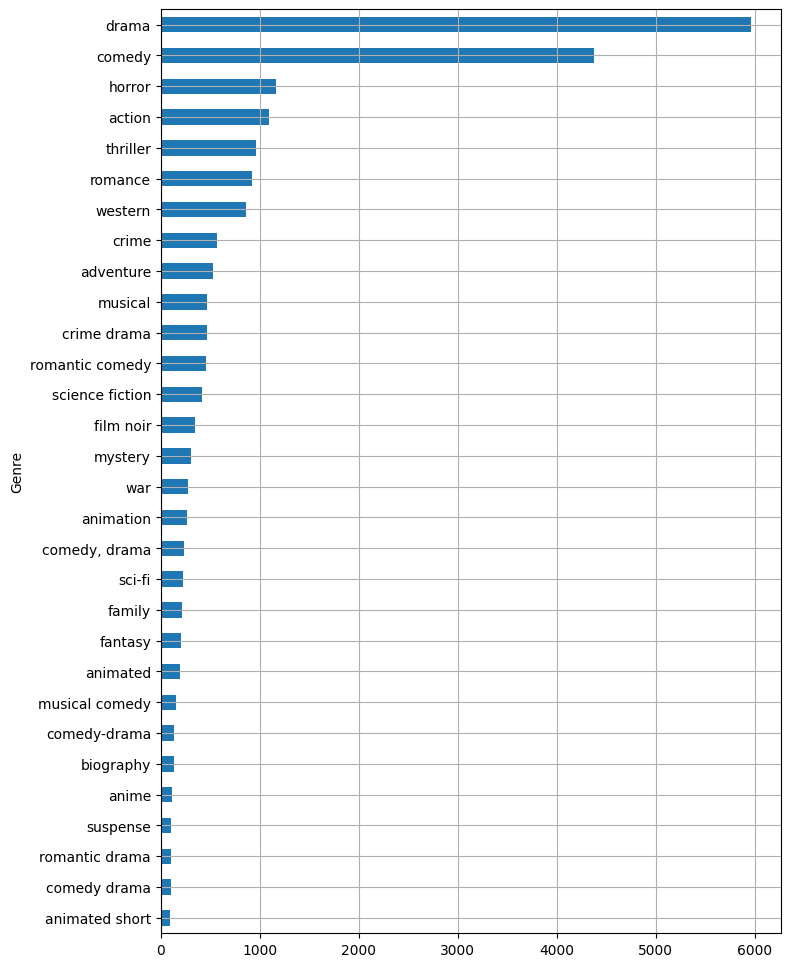

In [69]:
movies_df[movies_df["Genre"] != "unknown"].groupby(["Genre"]).size().sort_values(ascending=True).tail(30).plot.barh(figsize=(8, 12), grid=True)

In [71]:

# Check the number of rows and columns in the DataFrame
print("Number of rows:", movies_df.shape[0])
print("Number of columns:", movies_df.shape[1])

Number of rows: 34886
Number of columns: 4


In [72]:
def check_missing_values(df):
    # Count missing values in each column
    missing_values = df.isna().sum()

    # Calculate total missing values
    total_missing_values = missing_values.sum()
    
    # Calculate percentage of missing values
    percentage_missing_values = (total_missing_values / df.shape[0]) * 100

    # Return a dictionary with counts and percentages
    return {
        'Total missing values': total_missing_values,
        'Percentage missing values': percentage_missing_values
    }



In [73]:
# Print the results of the function
print(check_missing_values(movies_df))

{'Total missing values': 0, 'Percentage missing values': 0.0}


In [75]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

print("Certificates installed successfully.")

Certificates installed successfully.


Below we get the list of the most frequent words and their occurrences in the plots of the movies after removing all the stopwords.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


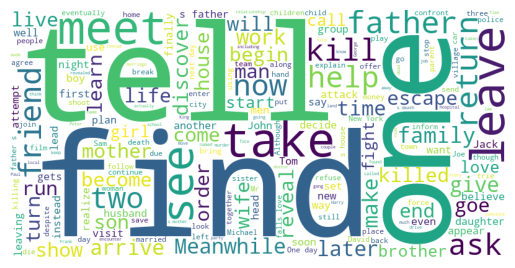

In [77]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

# Extract the movie plots
plots = movies_df['Plot']

# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_plots = []
for plot in plots:
    words = word_tokenize(plot)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_plots.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [87]:
from nltk.stem import SnowballStemmer
nltk.download('wordnet')
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer('english')

def preprocess(text):
    result = []

    # Remove stopwords
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)

    # Remove tokens shorter than 3 characters
    result = [token for token in result if len(token) > 2]

    # Lemmatize remaining tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in result]

    return lemmatized_tokens

# Apply the preprocess function to the movie plots
preprocessed_documents = plots.map(preprocess)


preprocessed_documents.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [bartender, work, saloon, serve, drink, custom...
1    [moon, paint, smile, face, hang, park, night, ...
2    [film, minute, long, compose, shots, girl, sit...
3    [last, second, consist, shots, shoot, set, woo...
4    [earliest, know, adaptation, classic, fairytal...
Name: Plot, dtype: object

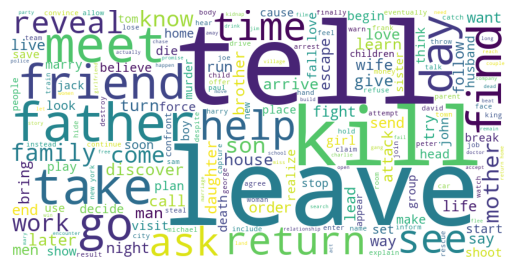

In [89]:
from wordcloud import WordCloud, STOPWORDS
# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_plots = []
for document in preprocessed_documents:
    filtered_words = [word for word in document if word not in stop_words]
    filtered_plots.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()